## 学習データの画像サイズ分布を調べる

In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from src.data_handler import load_trainable_df
from src.const import OUTPUT_ROOT

In [6]:
DST_DIR = OUTPUT_ROOT / 'debugs'
DST_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
def get_img_size_df_from_path_df(path_df: pd.DataFrame):
    img_size_df = []
    for _, row in tqdm(path_df.iterrows(), total=len(path_df)):
        img_path = row['filepath']
        height, width = get_img_size(img_path)
        img_size_df.append({
            **row,
            'height': height,
            'width': width
        })
    return pd.DataFrame(img_size_df)


def get_img_size(img_path):
    img = cv2.imread(img_path)
    h, w = img.shape[0], img.shape[1]
    return h, w

In [3]:
train_df, test_df, cite_df, _ = load_trainable_df()

### 学習用データ

In [4]:
train_img_size_df = get_img_size_df_from_path_df(train_df)
train_img_size_df.to_csv(DST_DIR / 'train_img_size.csv', index=False)

100% 108160/108160 [09:50<00:00, 183.15it/s]


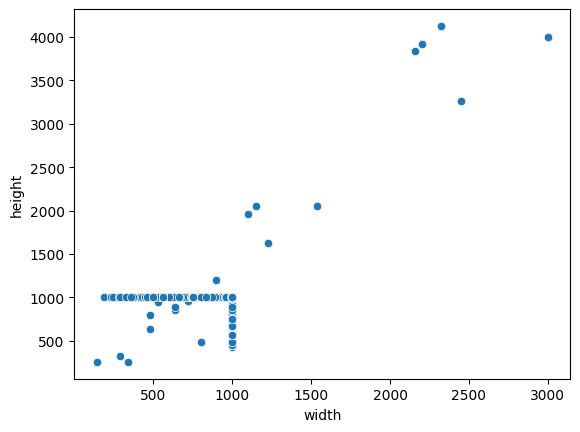

In [9]:
sns.scatterplot(data=train_img_size_df, x='width', y='height')
plt.show()

In [18]:
train_img_size_df[['height', 'width']].describe()

,height,width
count,108160.000000,108160.000000
mean,989.344961,742.544822
std,87.624846,130.374771
min,256.000000,143.000000
25%,1000.000000,750.000000
50%,1000.000000,750.000000
75%,1000.000000,750.000000
max,4128.000000,3000.000000


### citeデータとテストデータ

In [8]:
cite_img_size_df = get_img_size_df_from_path_df(cite_df)
test_img_size_df = get_img_size_df_from_path_df(test_df)
cite_img_size_df.to_csv(DST_DIR / 'cite_img_size.csv', index=False)
test_img_size_df.to_csv(DST_DIR / 'test_img_size.csv', index=False)

100% 109481/109481 [10:07<00:00, 180.35it/s]
100% 2942/2942 [00:16<00:00, 177.05it/s]


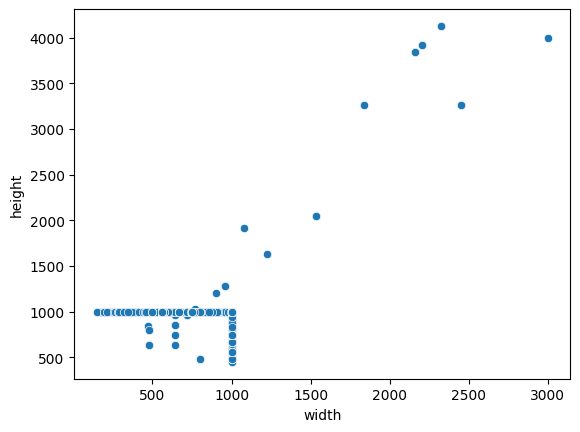

In [10]:
sns.scatterplot(data=cite_img_size_df, x='width', y='height')
plt.show()

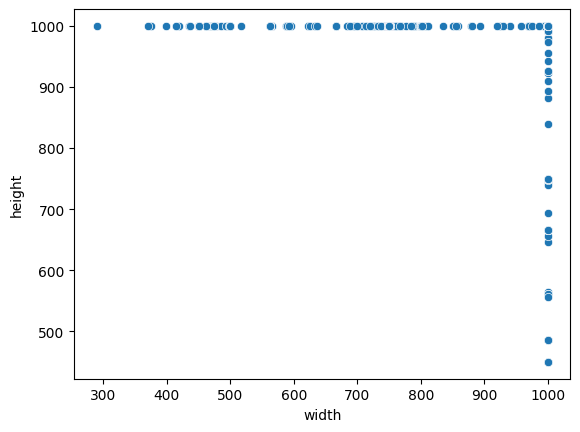

In [11]:
sns.scatterplot(data=test_img_size_df, x='width', y='height')
plt.show()